In [1]:
import sys
from dotenv import load_dotenv
import os
import sys
from pathlib import Path

AVES_ROOT = Path("../aves")
CENSUS_GEO_ROOT = AVES_ROOT / "data" / "external" / "censo_2017" / "geometria"

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 96


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

from aves.config import setup_style

from aves.data import eod
from aves.data.census.loading import read_census_map
from aves.features.utils import normalize_rows

setup_style()

In [3]:
import sys

sys.argv.append(["--max-memory", "8G"])

import datetime
from pathlib import Path

import geopandas as gpd
import pandas as pd
import pyrosm
import seaborn as sns
from r5py import TransportMode, TransportNetwork, TravelTimeMatrixComputer

from aves.data import eod
from aves.visualization.figures import small_multiples_from_geodataframe

In [4]:
network = TransportNetwork("/home/javiergonb/aves/data/external/OSM/clipped-scl-osm.pbf", '/home/javiergonb/aves/data/external/gtfs/GTFS-V124-PO20240601b.zip')

In [5]:

OSM_PATH = AVES_ROOT / "data" / "external" / "OSM"
osm_clipped_file = OSM_PATH / "clipped-scl-osm.pbf"

zones = gpd.read_file(AVES_ROOT / "data" / "processed" / "scl_zonas_urbanas.json")

In [6]:
zones['geometry_original'] = zones['geometry']
zones['geometry'] = zones.centroid

/tmp/ipykernel_1019/3054921321.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zones['geometry'] = zones.centroid


In [7]:
zones_orig = zones.drop('geometry', axis=1).rename({'geometry_original': 'geometry'}, axis=1)

In [8]:
comunas = read_census_map('comuna', path=CENSUS_GEO_ROOT / "R13")

In [9]:
comunas_urbanas = comunas[comunas['COMUNA'].isin(zones_orig['Com'].unique())].drop('NOM_COMUNA', axis=1).copy()
comunas_urbanas['NombreComuna'] = comunas_urbanas['COMUNA'].map(dict(zip(zones_orig['Com'], zones_orig['Comuna'])))


<Axes: >

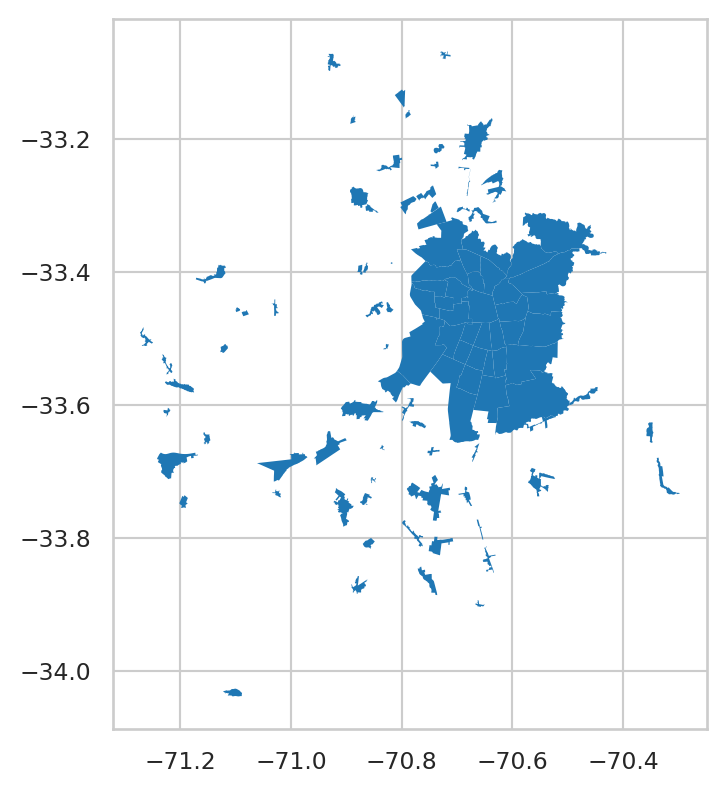

In [10]:
from aves.data.census.loading import read_census_map

censusmap = read_census_map('limite_urbano_censal', path=CENSUS_GEO_ROOT / "R13")
censusmap.plot(linewidth=0)

<Axes: >

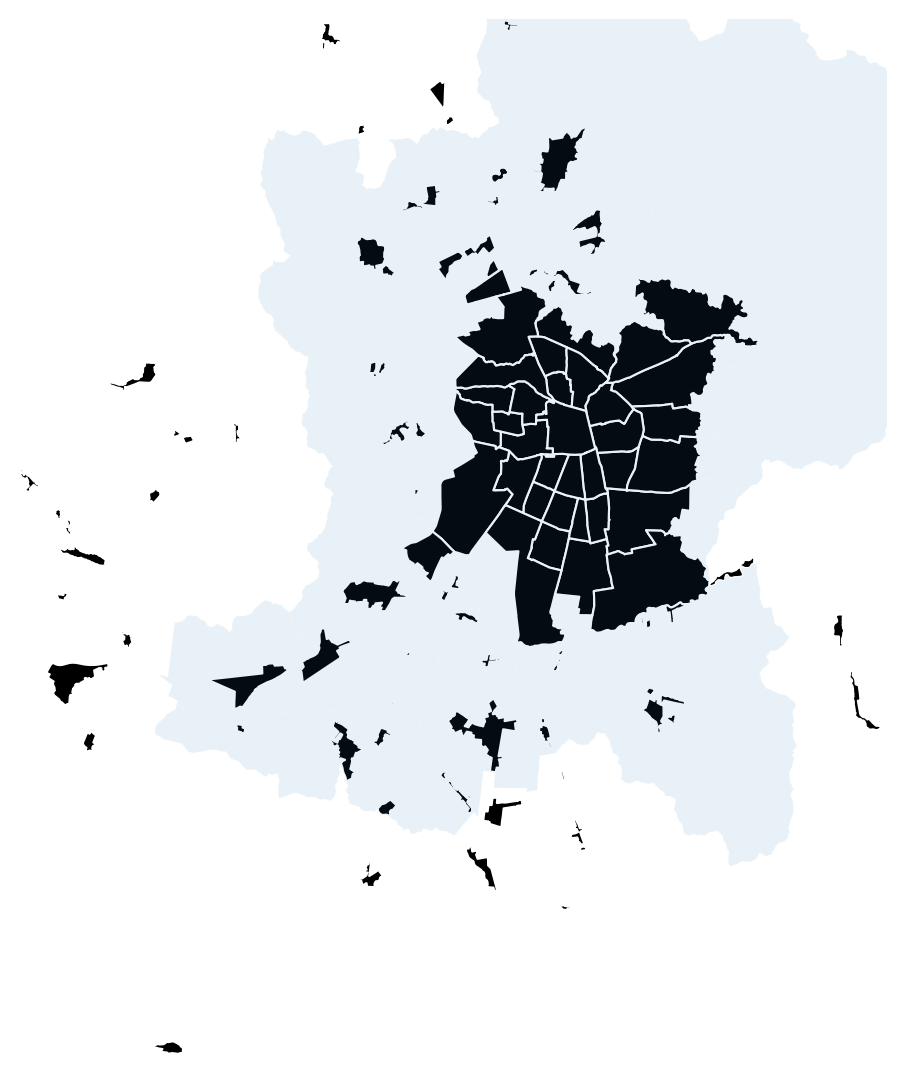

In [12]:


from aves.visualization.figures import figure_from_geodataframe

fig, ax = figure_from_geodataframe(censusmap, height=7)

censusmap.plot(ax=ax, facecolor='black', edgecolor='white', zorder=0)

comunas_urbanas.plot(ax=ax, alpha=0.1,edgecolor='white', zorder=1)


In [ ]:
censusmap

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,geometry
0,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PAINE,CAPITAL COMUNAL,CIUDAD,0.146714,0.000531,"POLYGON ((-70.73797 -33.79851, -70.73738 -33.7..."
1,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,HUELQUÉN,URBANO,PUEBLO,0.167916,0.000205,"POLYGON ((-70.64840 -33.81521, -70.64859 -33.8..."
2,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,HOSPITAL,URBANO,CIUDAD,0.139694,0.000445,"POLYGON ((-70.76468 -33.84349, -70.76448 -33.8..."
3,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PINTUÉ - LA GUACHERA,URBANO,PUEBLO,0.148207,0.000292,"POLYGON ((-70.87824 -33.86540, -70.87839 -33.8..."
4,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,EL TRÁNSITO,URBANO,PUEBLO,0.073625,0.000066,"POLYGON ((-70.65834 -33.78357, -70.65832 -33.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...
98,13,REGIÓN METROPOLITANA DE SANTIAGO,136,TALAGANTE,13602,EL MONTE,EL MONTE,CAPITAL COMUNAL,CIUDAD,0.239998,0.001263,"POLYGON ((-70.99282 -33.67260, -70.99282 -33.6..."
99,13,REGIÓN METROPOLITANA DE SANTIAGO,136,TALAGANTE,13601,TALAGANTE,TALAGANTE,CAPITAL PROVINCIAL,CIUDAD,0.196917,0.001008,"POLYGON ((-70.92714 -33.64912, -70.92705 -33.6..."
100,13,REGIÓN METROPOLITANA DE SANTIAGO,136,TALAGANTE,13601,TALAGANTE,EL ROTO CHILENO,URBANO,PUEBLO,0.029724,0.000022,"POLYGON ((-70.83494 -33.66122, -70.83443 -33.6..."
101,13,REGIÓN METROPOLITANA DE SANTIAGO,136,TALAGANTE,13601,TALAGANTE,LONQUÉN,URBANO,PUEBLO,0.028902,0.000020,"POLYGON ((-70.85226 -33.71130, -70.85154 -33.7..."


<Axes: >

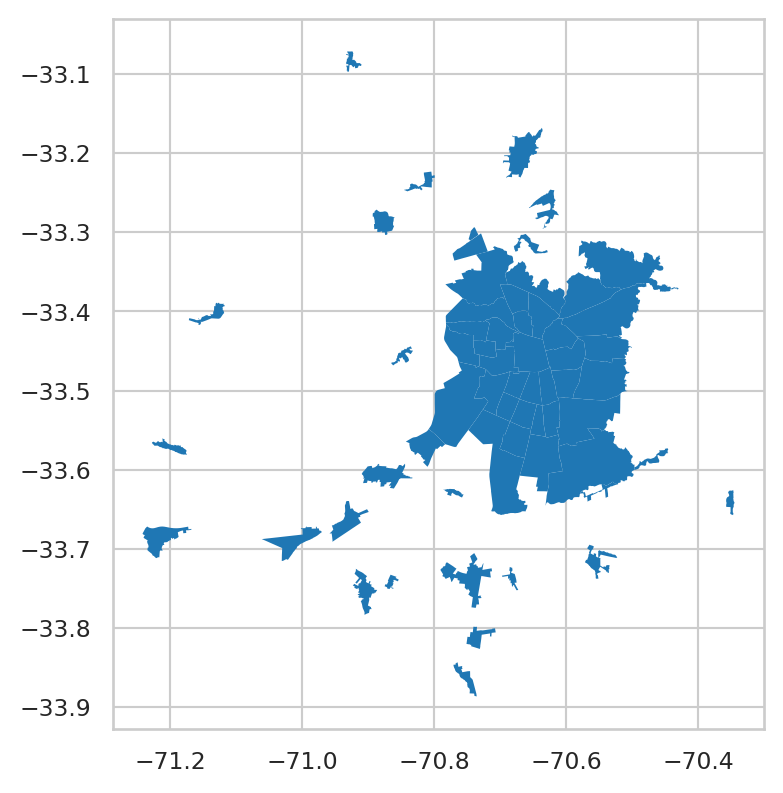

In [13]:
censusmap = censusmap[censusmap["NOM_CATEG"]=="CIUDAD" ]

censusmap.plot(linewidth=0)

In [ ]:
zones_orig

,ID,AREA,Zona,Com,Comuna,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,area_m2,geometry
0,103,837.7500,103.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,4.575649e+05,"POLYGON ((-70.65492 -33.55500, -70.65517 -33.5..."
1,104,998.8125,104.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.725462e+05,"POLYGON ((-70.67599 -33.55542, -70.67452 -33.5..."
2,106,286.2500,106.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,2.693838e+06,"POLYGON ((-70.67891 -33.55911, -70.68019 -33.5..."
3,115,857.4375,115.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.534193e+05,"POLYGON ((-70.67625 -33.55513, -70.67653 -33.5..."
4,116,853.9375,116.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.184305e+05,"POLYGON ((-70.66564 -33.55260, -70.66309 -33.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,364,678.7500,364.0,13118,Macul,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13118,MACUL,MACUL,CAPITAL COMUNAL,CIUDAD,0.150721,0.001246,6.572471e+05,"POLYGON ((-70.59655 -33.47354, -70.59497 -33.4..."
862,369,793.2500,369.0,13118,Macul,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13118,MACUL,MACUL,CAPITAL COMUNAL,CIUDAD,0.150721,0.001246,6.393742e+05,"POLYGON ((-70.59590 -33.48557, -70.59681 -33.4..."
863,365,471.6875,365.0,13118,Macul,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13118,MACUL,MACUL,CAPITAL COMUNAL,CIUDAD,0.150721,0.001246,9.368650e+05,"POLYGON ((-70.60427 -33.47400, -70.60126 -33.4..."
864,734,864.0000,734.0,13301,Colina,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,COLINA,LO ARCAYA - CASAS VIEJAS,URBANO,PUEBLO,0.049422,0.000034,3.481754e+05,"POLYGON ((-70.69246 -33.24243, -70.69104 -33.2..."


In [14]:
import geopandas as gpd
from shapely.ops import unary_union
import matplotlib.pyplot as plt


# Create the outer boundary of all zones
outer_boundary = unary_union(zones.geometry)


# Create a GeoDataFrame for the outer boundary
outer_boundary_gdf = gpd.GeoDataFrame(geometry=[outer_boundary], crs=zones.crs)

# Spatial join to keep only the communes that intersect with the outer boundary
filtered_communes_gdf = gpd.sjoin(censusmap, outer_boundary_gdf, how='inner', op='intersects')

# Drop the additional join-related columns
filtered_communes_gdf = filtered_communes_gdf.drop(columns=['index_right'])



/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_15802/2430685166.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4674
Right CRS: EPSG:4326

  filtered_communes_gdf = gpd.sjoin(censusmap, outer_boundary_gdf, how='inner', op='intersects')


<Axes: >

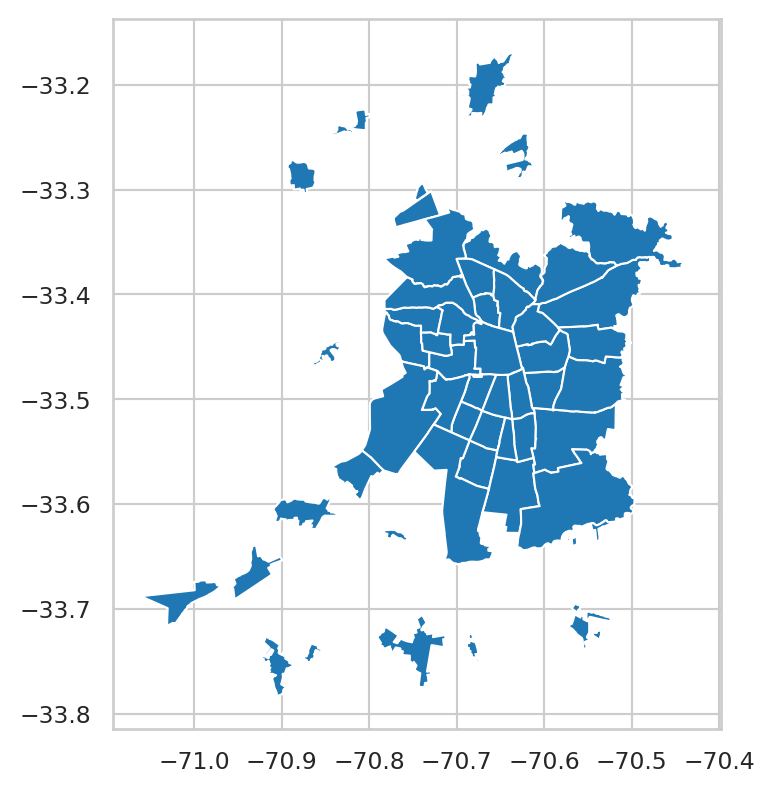

In [15]:
filtered_communes_gdf.plot()

In [ ]:
filtered_communes_gdf.to_file('geod/filtered_communes.geojson', driver='GeoJSON')

In [16]:
import pyrosm

osm = pyrosm.OSM(str(osm_clipped_file))

In [17]:
pois = osm.get_pois()   

In [18]:
from aves.features.osm.pois import categorize_pois

cat_pois = categorize_pois(pois)
cat_pois

no match amenity telephone None
general match shop general
general match shop hardware
general match shop computer
no match building yes Castaño
general match shop yes
general match shop farm
no match amenity waste_transfer_station KDM
general match shop stationery
general match shop motorcycle
general match shop cosmetics
no match amenity school;kindergarten Colegio Madre de Jesús
general match shop toys
general match shop funeral_directors
no match amenity salon de belleza salon de belleza angel
general match shop gift
general match shop garden_centre
general match shop hifi
no match amenity vending_machine Máquina de Coca-Cola
no match amenity grave_yard Sodexo Chile
no match natural peak Cerro Tarapacá
general match shop tyres
no match highway elevator Ascensor Santa Lucía (closed)
no match amenity compressed_air None
general match shop gas
general match shop baby_goods
no match amenity internet_access Almacen Ciber Cafe
no match historic monument Casas de Calera de Tango
general m

,taxonomy,name,geometry
0,health,Lentes Online,POINT (-70.65112 -33.43955)
1,nightlife,Bar Ciudadano,POINT (-70.62849 -33.44622)
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654)
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654)
3,transport,Parada Colón Buses al Sur,POINT (-70.71517 -33.58955)
...,...,...,...
41326,transport:car,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3..."
41328,food,Odfjell Vineyards,"POLYGON ((-70.87753 -33.53971, -70.87754 -33.5..."
41329,religion,Catedral Metropolitana de Santiago de Chile,"POLYGON ((-70.65152 -33.43776, -70.65168 -33.4..."
41330,transport,None,"POLYGON ((-70.62382 -33.27129, -70.62376 -33.2..."


In [19]:
people = eod.read_people()
people

,Hogar,Persona,AnoNac,Sexo,Relacion,Viajes,LicenciaConducir,PaseEscolar,AdultoMayor,Estudios,...,TramoIngreso,IngresoFinal,TramoIngresoFinal,IngresoImputado,Factor_LaboralNormal,Factor_SabadoNormal,Factor_DomingoNormal,Factor_LaboralEstival,Factor_FindesemanaEstival,FactorPersona
0,100010,10001001,1958,Hombre,Jefe(a) de Hogar,2,3,2,2,4.0,...,Entre 200.001 y 400.000 pesos,240000,2,0,NaN,NaN,1668.2600,NaN,NaN,82.58553
1,100010,10001002,1956,Mujer,Cónyuge o pareja,5,1,2,2,5.0,...,NaN,0,0,0,NaN,NaN,852.1137,NaN,NaN,99.53422
2,100010,10001003,1982,Mujer,Hijo o Hija,0,1,2,2,7.0,...,Entre 200.001 y 400.000 pesos,210845,2,2,NaN,NaN,1609.1630,NaN,NaN,151.59367
3,100020,10002001,1954,Hombre,Jefe(a) de Hogar,4,3,2,2,4.0,...,Menos de 200.000 pesos,133000,1,0,169.50230,NaN,NaN,NaN,NaN,45.21325
4,100020,10002002,1961,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,Menos de 200.000 pesos,193000,1,0,43.26765,NaN,NaN,NaN,NaN,25.62248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60049,706791,70679101,1956,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,NaN,0,0,0,NaN,NaN,320.9519,NaN,NaN,17.87670
60050,706791,70679102,1955,Hombre,Jefe(a) de Hogar,0,1,2,2,5.0,...,Entre 200.001 y 400.000 pesos,396715,2,2,NaN,NaN,320.9519,NaN,NaN,21.07324
60051,743813,74381301,1943,Hombre,Jefe(a) de Hogar,2,1,2,2,5.0,...,Menos de 200.000 pesos,140369,1,2,NaN,NaN,281.4610,NaN,NaN,15.34897
60052,743813,74381302,1943,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,Menos de 200.000 pesos,177636,1,2,NaN,NaN,288.1693,NaN,NaN,17.30931


In [20]:
homes = eod.read_homes()
homes

,Hogar,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumVeh,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,1,1,0,2,53000.0,0,100000,0,450845,136.393738
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,1,3,0,1,NaN,0,120000,0,1019369,73.843597
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,0,0,3,NaN,0,70000,0,80000,180.722809
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,0,1,0,1,NaN,0,80000,0,559259,150.379059
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,0,0,1,NaN,0,117771,1,710309,122.001518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,0,1,1,1,NaN,0,100000,0,300000,75.526031
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,0,2,2,1,NaN,0,140000,0,695186,174.348663
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,0,0,1,NaN,0,200000,0,396715,71.358963
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,0,0,1,NaN,0,80000,0,318005,68.410446


In [21]:
from shapely.geometry import Point
homes['geometry'] = homes.apply(lambda row: Point(row['DirCoordX'], row['DirCoordY']), axis=1)
homes = gpd.GeoDataFrame(homes, geometry='geometry', crs="EPSG:4326")
population_per_home = people.groupby('Hogar').size().reset_index(name='population')
homes_with_population = homes.merge(population_per_home, on='Hogar')
homes_with_population

,Hogar,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry,population
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,0,2,53000.0,0,100000,0,450845,136.393738,POINT (335180.80190 6266420.97500),3
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,0,1,NaN,0,120000,0,1019369,73.843597,POINT (338410.21140 6265607.14100),5
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,3,NaN,0,70000,0,80000,180.722809,POINT (327863.82480 6257800.08600),1
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,0,1,NaN,0,80000,0,559259,150.379059,POINT (327864.00000 6257800.00000),5
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,1,NaN,0,117771,1,710309,122.001518,POINT (338480.81520 6267296.94100),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,1,1,NaN,0,100000,0,300000,75.526031,POINT (339104.10110 6263063.92500),5
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,2,1,NaN,0,140000,0,695186,174.348663,POINT (338539.17410 6299539.20300),6
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,1,NaN,0,200000,0,396715,71.358963,POINT (338563.22010 6299580.11800),2
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,1,NaN,0,80000,0,318005,68.410446,POINT (349410.28120 6289668.96200),2


In [22]:
homes = homes.rename(columns={'Hogar': 'id'}).drop_duplicates(subset=['id'])
homes

,id,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,1,0,2,53000.0,0,100000,0,450845,136.393738,POINT (335180.80190 6266420.97500)
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,3,0,1,NaN,0,120000,0,1019369,73.843597,POINT (338410.21140 6265607.14100)
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,0,3,NaN,0,70000,0,80000,180.722809,POINT (327863.82480 6257800.08600)
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,1,0,1,NaN,0,80000,0,559259,150.379059,POINT (327864.00000 6257800.00000)
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,0,1,NaN,0,117771,1,710309,122.001518,POINT (338480.81520 6267296.94100)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,1,1,1,NaN,0,100000,0,300000,75.526031,POINT (339104.10110 6263063.92500)
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,2,2,1,NaN,0,140000,0,695186,174.348663,POINT (338539.17410 6299539.20300)
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,0,1,NaN,0,200000,0,396715,71.358963,POINT (338563.22010 6299580.11800)
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,0,1,NaN,0,80000,0,318005,68.410446,POINT (349410.28120 6289668.96200)


In [23]:
cat_pois_area_essentials = gpd.sjoin(cat_pois, zones_orig[["NOM_COMUNA", "geometry"]], op="within")
cat_pois_area_essentials = cat_pois_area_essentials.rename(columns={'index_right': 'ID'})

cat_pois_area_essentials

/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,taxonomy,name,geometry,ID,NOM_COMUNA
0,health,Lentes Online,POINT (-70.65112 -33.43955),565,SANTIAGO
1,nightlife,Bar Ciudadano,POINT (-70.62849 -33.44622),700,PROVIDENCIA
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA
4,entertainment,Museo de los Tajamares,POINT (-70.63040 -33.43560),699,PROVIDENCIA
...,...,...,...,...,...
41326,transport,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",664,HUECHURABA
41326,transport:car,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",664,HUECHURABA
41329,religion,Catedral Metropolitana de Santiago de Chile,"POLYGON ((-70.65152 -33.43776, -70.65168 -33.4...",565,SANTIAGO
41330,transport,None,"POLYGON ((-70.62382 -33.27129, -70.62376 -33.2...",521,COLINA


In [24]:
criteria = (
            (cat_pois_area_essentials["taxonomy"] == "health") |
            (cat_pois_area_essentials["taxonomy"] == "education") |
            (cat_pois_area_essentials["taxonomy"] == "food") |
            (cat_pois_area_essentials["taxonomy"] == "entertainment") |
            (cat_pois_area_essentials["taxonomy"] == "professional") |
            (cat_pois_area_essentials["taxonomy"] == "transport") |
            (cat_pois_area_essentials["taxonomy"] == "convenience")
            
            )
cat_pois_area_essentials = cat_pois_area_essentials.loc[criteria]
cat_pois_area_essentials['geometry'] = cat_pois_area_essentials['geometry'].centroid
cat_pois_area_essentials

/tmp/ipykernel_15802/127140369.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cat_pois_area_essentials['geometry'] = cat_pois_area_essentials['geometry'].centroid
/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,taxonomy,name,geometry,ID,NOM_COMUNA
0,health,Lentes Online,POINT (-70.65112 -33.43955),565,SANTIAGO
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA
4,entertainment,Museo de los Tajamares,POINT (-70.63040 -33.43560),699,PROVIDENCIA
5,convenience,Farmacias Ahumada,POINT (-70.52505 -33.37624),414,LAS CONDES
...,...,...,...,...,...
41322,food,Galería Comercial Arturo Prat,POINT (-70.64928 -33.44781),571,SANTIAGO
41323,entertainment,Palacio Larraín Mancheño,POINT (-70.66303 -33.44334),593,SANTIAGO
41325,transport,Aparcadero Municipal de Pedro Aguirre Cerda,POINT (-70.67709 -33.50711),771,PEDRO AGUIRRE CERDA
41326,transport,None,POINT (-70.63485 -33.37592),664,HUECHURABA


In [25]:
from pyproj import Transformer

# Convert x, y coordinates to geometry
def transform_coordinates(x, y):
    transformer = Transformer.from_crs("EPSG:32719", "EPSG:4326", always_xy=True)  # UTM to WGS84
    lon, lat = transformer.transform(x, y)
    return Point(lon, lat)


In [26]:
homes['geometry'] = homes.apply(lambda row: transform_coordinates(row['DirCoordX'], row['DirCoordY']), axis=1)
homes

,id,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,1,0,2,53000.0,0,100000,0,450845,136.393738,POINT (-70.77903 -33.72944)
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,3,0,1,NaN,0,120000,0,1019369,73.843597,POINT (-70.74434 -33.73728)
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,0,3,NaN,0,70000,0,80000,180.722809,POINT (-70.85966 -33.80599)
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,1,0,1,NaN,0,80000,0,559259,150.379059,POINT (-70.85965 -33.80599)
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,0,1,NaN,0,117771,1,710309,122.001518,POINT (-70.74327 -33.72205)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,1,1,1,NaN,0,100000,0,300000,75.526031,POINT (-70.73731 -33.76031)
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,2,2,1,NaN,0,140000,0,695186,174.348663,POINT (-70.73681 -33.43139)
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,0,1,NaN,0,200000,0,396715,71.358963,POINT (-70.73654 -33.43102)
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,0,1,NaN,0,80000,0,318005,68.410446,POINT (-70.62157 -33.52196)


In [27]:
# Convert to GeoDataFrame
homes_gdf = gpd.GeoDataFrame(homes, geometry='geometry')
homes_gdf.crs = "EPSG:4326"


In [28]:
criteria = (
            (cat_pois_area_essentials["taxonomy"] == "education") 
            
            
            )
school_pois = cat_pois_area_essentials.loc[criteria]
school_pois

,taxonomy,name,geometry,ID,NOM_COMUNA
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA
95,education,Bibliotren,POINT (-70.57514 -33.61610),109,PUENTE ALTO
160,education,ANEPE,POINT (-70.59669 -33.42841),692,PROVIDENCIA
215,education,Instituto Profesional de Artes Culinarias y Se...,POINT (-70.52118 -33.34828),500,LO BARNECHEA
237,education,None,POINT (-70.62878 -33.44402),700,PROVIDENCIA
...,...,...,...,...,...
41301,education,Colegio Bradford School,POINT (-70.57294 -33.38430),479,VITACURA
41309,education,Universidad Alberto Hurtado,POINT (-70.66210 -33.44513),593,SANTIAGO
41310,education,Universidad Diego Portales,POINT (-70.66043 -33.45059),574,SANTIAGO
41315,education,Universidad Mayor Campus Santo Domingo,POINT (-70.64773 -33.43553),564,SANTIAGO


In [29]:
school_pois['unique_id'] = range(len(school_pois))
school_pois

/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,taxonomy,name,geometry,ID,NOM_COMUNA,unique_id
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA,0
95,education,Bibliotren,POINT (-70.57514 -33.61610),109,PUENTE ALTO,1
160,education,ANEPE,POINT (-70.59669 -33.42841),692,PROVIDENCIA,2
215,education,Instituto Profesional de Artes Culinarias y Se...,POINT (-70.52118 -33.34828),500,LO BARNECHEA,3
237,education,None,POINT (-70.62878 -33.44402),700,PROVIDENCIA,4
...,...,...,...,...,...,...
41301,education,Colegio Bradford School,POINT (-70.57294 -33.38430),479,VITACURA,5121
41309,education,Universidad Alberto Hurtado,POINT (-70.66210 -33.44513),593,SANTIAGO,5122
41310,education,Universidad Diego Portales,POINT (-70.66043 -33.45059),574,SANTIAGO,5123
41315,education,Universidad Mayor Campus Santo Domingo,POINT (-70.64773 -33.43553),564,SANTIAGO,5124


In [30]:

import matplotlib.pyplot as plt
import pandas as pd


full_cost_computer = TravelTimeMatrixComputer(
    network,
    # todos los orígenes
    origins=homes_gdf.drop_duplicates(subset=['id']),
    # solo celdas con hospitales
    destinations=school_pois.rename(columns={'unique_id': 'id'}).drop_duplicates(subset=['id']),
    departure=datetime.datetime(2018, 7, 10, 8, 30),
    transport_modes=[TransportMode.TRANSIT, TransportMode.WALK],
)
travel_time_matrix = full_cost_computer.compute_travel_times()

# Filter travel times within 15 minutes (900 seconds)
accessibility_matrix = travel_time_matrix[travel_time_matrix['travel_time'] <= 45]

# Merge people with homes to get the commune for each person
people_homes = people.merge(homes, left_on='Hogar', right_on='id', suffixes=('', '_home'))
people_homes

population_per_commune = people_homes['Comuna'].value_counts()
population_per_commune

# Calculate the number of accessible amenities per home
accessibility_per_home = accessibility_matrix.groupby('from_id').size()
accessibility_per_home

# Convert the Series to a DataFrame
accessibility_per_home = accessibility_per_home.reset_index(name='accessibility')
accessibility_per_home

# Merge accessibility with homes to get the commune for each home
accessibility_homes = homes.merge(accessibility_per_home, left_on='id', right_on='from_id', how='left').fillna(0)
accessibility_homes

sum_accessibility_per_commune = accessibility_homes.groupby('Comuna')['accessibility'].sum()

accessibility_index = sum_accessibility_per_commune / population_per_commune
# Convert to a DataFrame for merging
accessibility_index_df = accessibility_index.reset_index()
accessibility_index_df.columns = ['Comuna', 'accessibility_index']

accessibility_index_df= accessibility_index_df.rename(columns={"Comuna":"NombreComuna"})

accessibility_index_df['NombreComuna'] = accessibility_index_df['NombreComuna'].replace({
    'CONCHALI': 'CONCHALÍ',
    'ESTACION CENTRAL': 'ESTACIÓN CENTRAL',
    'PEÑALOLEN' : 'PEÑALOLÉN',
    'MAIPU' : 'MAIPÚ',
    'SAN RAMON' : 'SAN RAMÓN',
    'SAN JOAQUIN' : 'SAN JOAQUÍN'

})

comunas_urbanas['NombreComuna'] = comunas_urbanas['NombreComuna'].str.upper()

accessibility_index_hospitals_df = accessibility_index_df

# Assuming you have a DataFrame named df
accessibility_index_hospitals_df.to_json("accesability_dfs/accses_school.json", force_ascii=False, orient='records')

/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/r5py/r5/regional_task.py:223: RuntimeWarning: Departure time 2018-07-10 08:30:00 is outside of the time range covered by currently loaded GTFS data sets.
  warnings.warn(


: 

In [ ]:
# Merge people with homes to get the commune for each person
people_homes = people.merge(homes, left_on='Hogar', right_on='id', suffixes=('', '_home'))
people_homes

,Hogar,Persona,AnoNac,Sexo,Relacion,Viajes,LicenciaConducir,PaseEscolar,AdultoMayor,Estudios,...,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry
0,100010,10001001,1958,Hombre,Jefe(a) de Hogar,2,3,2,2,4.0,...,1,0,2,53000.0,0,100000,0,450845,136.393738,POINT (-70.77903 -33.72944)
1,100010,10001002,1956,Mujer,Cónyuge o pareja,5,1,2,2,5.0,...,1,0,2,53000.0,0,100000,0,450845,136.393738,POINT (-70.77903 -33.72944)
2,100010,10001003,1982,Mujer,Hijo o Hija,0,1,2,2,7.0,...,1,0,2,53000.0,0,100000,0,450845,136.393738,POINT (-70.77903 -33.72944)
3,100020,10002001,1954,Hombre,Jefe(a) de Hogar,4,3,2,2,4.0,...,3,0,1,NaN,0,120000,0,1019369,73.843597,POINT (-70.74434 -33.73728)
4,100020,10002002,1961,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,3,0,1,NaN,0,120000,0,1019369,73.843597,POINT (-70.74434 -33.73728)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60049,706791,70679101,1956,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,0,0,1,NaN,0,200000,0,396715,71.358963,POINT (-70.73654 -33.43102)
60050,706791,70679102,1955,Hombre,Jefe(a) de Hogar,0,1,2,2,5.0,...,0,0,1,NaN,0,200000,0,396715,71.358963,POINT (-70.73654 -33.43102)
60051,743813,74381301,1943,Hombre,Jefe(a) de Hogar,2,1,2,2,5.0,...,0,0,1,NaN,0,80000,0,318005,68.410446,POINT (-70.62157 -33.52196)
60052,743813,74381302,1943,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,0,0,1,NaN,0,80000,0,318005,68.410446,POINT (-70.62157 -33.52196)


In [ ]:
population_per_commune = people_homes['Comuna'].value_counts()
population_per_commune

Comuna
PUENTE ALTO            6142
MAIPU                  5314
LA FLORIDA             3321
SAN BERNARDO           2717
LA PINTANA             2335
SANTIAGO               2262
LAS CONDES             2253
QUILICURA              2147
PUDAHUEL               1989
PEÑALOLEN              1759
ÑUÑOA                  1747
EL BOSQUE              1480
PROVIDENCIA            1153
RECOLETA               1139
CONCHALI               1123
LA GRANJA              1092
RENCA                  1067
PEDRO AGUIRRE CERDA    1017
CERRO NAVIA             967
ESTACION CENTRAL        963
COLINA                  962
MACUL                   894
PEÑAFLOR                859
MELIPILLA               848
SAN MIGUEL              842
LA REINA                835
SAN JOAQUIN             828
QUINTA NORMAL           800
SAN RAMON               781
LO BARNECHEA            779
HUECHURABA              775
LA CISTERNA             723
LAMPA                   713
LO ESPEJO               711
LO PRADO                674
INDEPENDENCIA

In [ ]:
# Calculate the number of accessible amenities per home
accessibility_per_home = accessibility_matrix.groupby('from_id').size()
accessibility_per_home

from_id
100010     1
100020     8
100052     8
100061     8
100070     8
          ..
700990     1
706781    42
706791    41
743813    32
743823    31
Length: 17657, dtype: int64

In [ ]:
# Convert the Series to a DataFrame
accessibility_per_home = accessibility_per_home.reset_index(name='accessibility')
accessibility_per_home

,from_id,accessibility
0,100010,1
1,100020,8
2,100052,8
3,100061,8
4,100070,8
...,...,...
17652,700990,1
17653,706781,42
17654,706791,41
17655,743813,32


In [ ]:
# Merge accessibility with homes to get the commune for each home
accessibility_homes = homes.merge(accessibility_per_home, left_on='id', right_on='from_id', how='left').fillna(0)
accessibility_homes

,id,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry,from_id,accessibility
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,2,53000.0,0,100000,0,450845,136.393738,POINT (-70.77903 -33.72944),100010.0,1.0
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,1,0.0,0,120000,0,1019369,73.843597,POINT (-70.74434 -33.73728),100020.0,8.0
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,3,0.0,0,70000,0,80000,180.722809,POINT (-70.85966 -33.80599),0.0,0.0
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,1,0.0,0,80000,0,559259,150.379059,POINT (-70.85965 -33.80599),0.0,0.0
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,1,0.0,0,117771,1,710309,122.001518,POINT (-70.74327 -33.72205),100052.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,1,0.0,0,100000,0,300000,75.526031,POINT (-70.73731 -33.76031),700990.0,1.0
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,1,0.0,0,140000,0,695186,174.348663,POINT (-70.73681 -33.43139),706781.0,42.0
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,1,0.0,0,200000,0,396715,71.358963,POINT (-70.73654 -33.43102),706791.0,41.0
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,1,0.0,0,80000,0,318005,68.410446,POINT (-70.62157 -33.52196),743813.0,32.0


In [ ]:
sum_accessibility_per_commune = accessibility_homes.groupby('Comuna')['accessibility'].sum()

In [ ]:
sum_accessibility_per_commune

Comuna
BUIN                     847.0
CALERA DE TANGO          184.0
CERRILLOS               1899.0
CERRO NAVIA             8976.0
COLINA                  1218.0
CONCHALI                5978.0
EL BOSQUE               8638.0
EL MONTE                 444.0
ESTACION CENTRAL        6400.0
HUECHURABA              1931.0
INDEPENDENCIA           9582.0
ISLA DE MAIPO            294.0
LA CISTERNA             7808.0
LA FLORIDA             23083.0
LA GRANJA               6930.0
LA PINTANA              6093.0
LA REINA                6277.0
LAMPA                    333.0
LAS CONDES             36976.0
LO BARNECHEA            1169.0
LO ESPEJO               1874.0
LO PRADO                6658.0
MACUL                   8386.0
MAIPU                  20911.0
MELIPILLA                  0.0
PADRE HURTADO            572.0
PEDRO AGUIRRE CERDA     6646.0
PEÑAFLOR                1585.0
PEÑALOLEN               8889.0
PIRQUE                   396.0
PROVIDENCIA            49479.0
PUDAHUEL               14947.0
P

In [ ]:
accessibility_index = sum_accessibility_per_commune / population_per_commune

In [ ]:
# Convert to a DataFrame for merging
accessibility_index_df = accessibility_index.reset_index()
accessibility_index_df.columns = ['Comuna', 'accessibility_index']

In [ ]:
accessibility_index_df= accessibility_index_df.rename(columns={"Comuna":"NombreComuna"})

In [ ]:
accessibility_index_df['NombreComuna'] = accessibility_index_df['NombreComuna'].replace({
    'CONCHALI': 'CONCHALÍ',
    'ESTACION CENTRAL': 'ESTACIÓN CENTRAL',
    'PEÑALOLEN' : 'PEÑALOLÉN',
    'MAIPU' : 'MAIPÚ',
    'SAN RAMON' : 'SAN RAMÓN',
    'SAN JOAQUIN' : 'SAN JOAQUÍN'

})

In [ ]:
import matplotlib.pyplot as plt
comunas_urbanas['NombreComuna'] = comunas_urbanas['NombreComuna'].str.upper()

In [ ]:
accessibility_index_hospitals_df = accessibility_index_df

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named df
accessibility_index_hospitals_df.to_json("accesability_dfs/accses_health.json", force_ascii=False, orient='records')

In [ ]:
# Read the JSON file back into a DataFrame
df_read = pd.read_json("accesability_dfs/accses_health.json", orient='records')

# Display the DataFrame
print(df_read)

           NombreComuna  accessibility_index
0                  BUIN             1.447863
1       CALERA DE TANGO             0.336380
2             CERRILLOS             3.097879
3           CERRO NAVIA             9.282316
4                COLINA             1.266112
5              CONCHALÍ             5.323241
6             EL BOSQUE             5.836486
7              EL MONTE             0.701422
8      ESTACIÓN CENTRAL             6.645898
9            HUECHURABA             2.491613
10        INDEPENDENCIA            14.948518
11        ISLA DE MAIPO             0.489185
12          LA CISTERNA            10.799447
13           LA FLORIDA             6.950617
14            LA GRANJA             6.346154
15           LA PINTANA             2.609422
16             LA REINA             7.517365
17                LAMPA             0.467041
18           LAS CONDES            16.411895
19         LO BARNECHEA             1.500642
20            LO ESPEJO             2.635724
21        

In [ ]:
df_read = df_read.rename(columns={'NombreComuna':'NOM_COMUNA'})
communes_gdf = filtered_communes_gdf.merge(df_read, on='NOM_COMUNA')

In [ ]:
communes_gdf

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,geometry,accessibility_index
0,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,BUIN,ALTO JAHUEL,URBANO,CIUDAD,0.111175,0.000193,"POLYGON ((-70.68356 -33.72361, -70.68334 -33.7...",1.447863
1,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,BUIN,BUIN,CAPITAL COMUNAL,CIUDAD,0.363689,0.001677,"POLYGON ((-70.73559 -33.71407, -70.73564 -33.7...",1.447863
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,CERRO NAVIA,CERRO NAVIA,CAPITAL COMUNAL,CIUDAD,0.170180,0.001076,"POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...",9.282316
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,PUDAHUEL,CAPITAL COMUNAL,CIUDAD,0.183893,0.001552,"POLYGON ((-70.78149 -33.41712, -70.78133 -33.4...",7.514832
4,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,CIUDAD DEL VALLE,URBANO,CIUDAD,0.126742,0.000256,"POLYGON ((-70.83515 -33.44500, -70.83449 -33.4...",7.514832
5,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,COLINA,COLINA,CAPITAL PROVINCIAL,CIUDAD,0.302769,0.001673,"POLYGON ((-70.63718 -33.17345, -70.63720 -33.1...",1.266112
6,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,COLINA,CHICUREO,URBANO,CIUDAD,0.257993,0.000686,"POLYGON ((-70.62082 -33.24688, -70.62075 -33.2...",1.266112
7,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,LAMPA,BATUCO,URBANO,CIUDAD,0.150483,0.000354,"POLYGON ((-70.80368 -33.22874, -70.80363 -33.2...",0.467041
8,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,LAMPA,LAMPA,CAPITAL COMUNAL,CIUDAD,0.123873,0.000698,"POLYGON ((-70.88207 -33.27444, -70.88175 -33.2...",0.467041
9,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,LAMPA,VALLE GRANDE,URBANO,CIUDAD,0.137442,0.000876,"POLYGON ((-70.72395 -33.31337, -70.72393 -33.3...",0.467041


In [ ]:
unique_communes = communes_gdf["NOM_COMUNA"].unique()

print(unique_communes)

['BUIN' 'CERRO NAVIA' 'PUDAHUEL' 'COLINA' 'LAMPA' 'HUECHURABA' 'CONCHALÍ'
 'EL BOSQUE' 'ESTACIÓN CENTRAL' 'PEDRO AGUIRRE CERDA' 'INDEPENDENCIA'
 'ISLA DE MAIPO' 'LO ESPEJO' 'LA CISTERNA' 'LA PINTANA' 'LA FLORIDA'
 'LA GRANJA' 'MACUL' 'PEÑALOLÉN' 'LAS CONDES' 'LO BARNECHEA' 'LA REINA'
 'ÑUÑOA' 'RECOLETA' 'PROVIDENCIA' 'CERRILLOS' 'MAIPÚ' 'LO PRADO'
 'VITACURA' 'QUINTA NORMAL' 'PEÑAFLOR' 'PADRE HURTADO' 'PUENTE ALTO'
 'QUILICURA' 'RENCA' 'CALERA DE TANGO' 'SAN BERNARDO' 'PIRQUE'
 'SAN JOAQUÍN' 'SAN MIGUEL' 'SAN RAMÓN' 'SANTIAGO' 'EL MONTE' 'TALAGANTE']


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define colors: grey (low) to bright purple (high)
colors = ["#808080", "#800080"]
n_bins = 200  # Number of bins for the colormap
cmap_name = 'grey_to_purple'

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

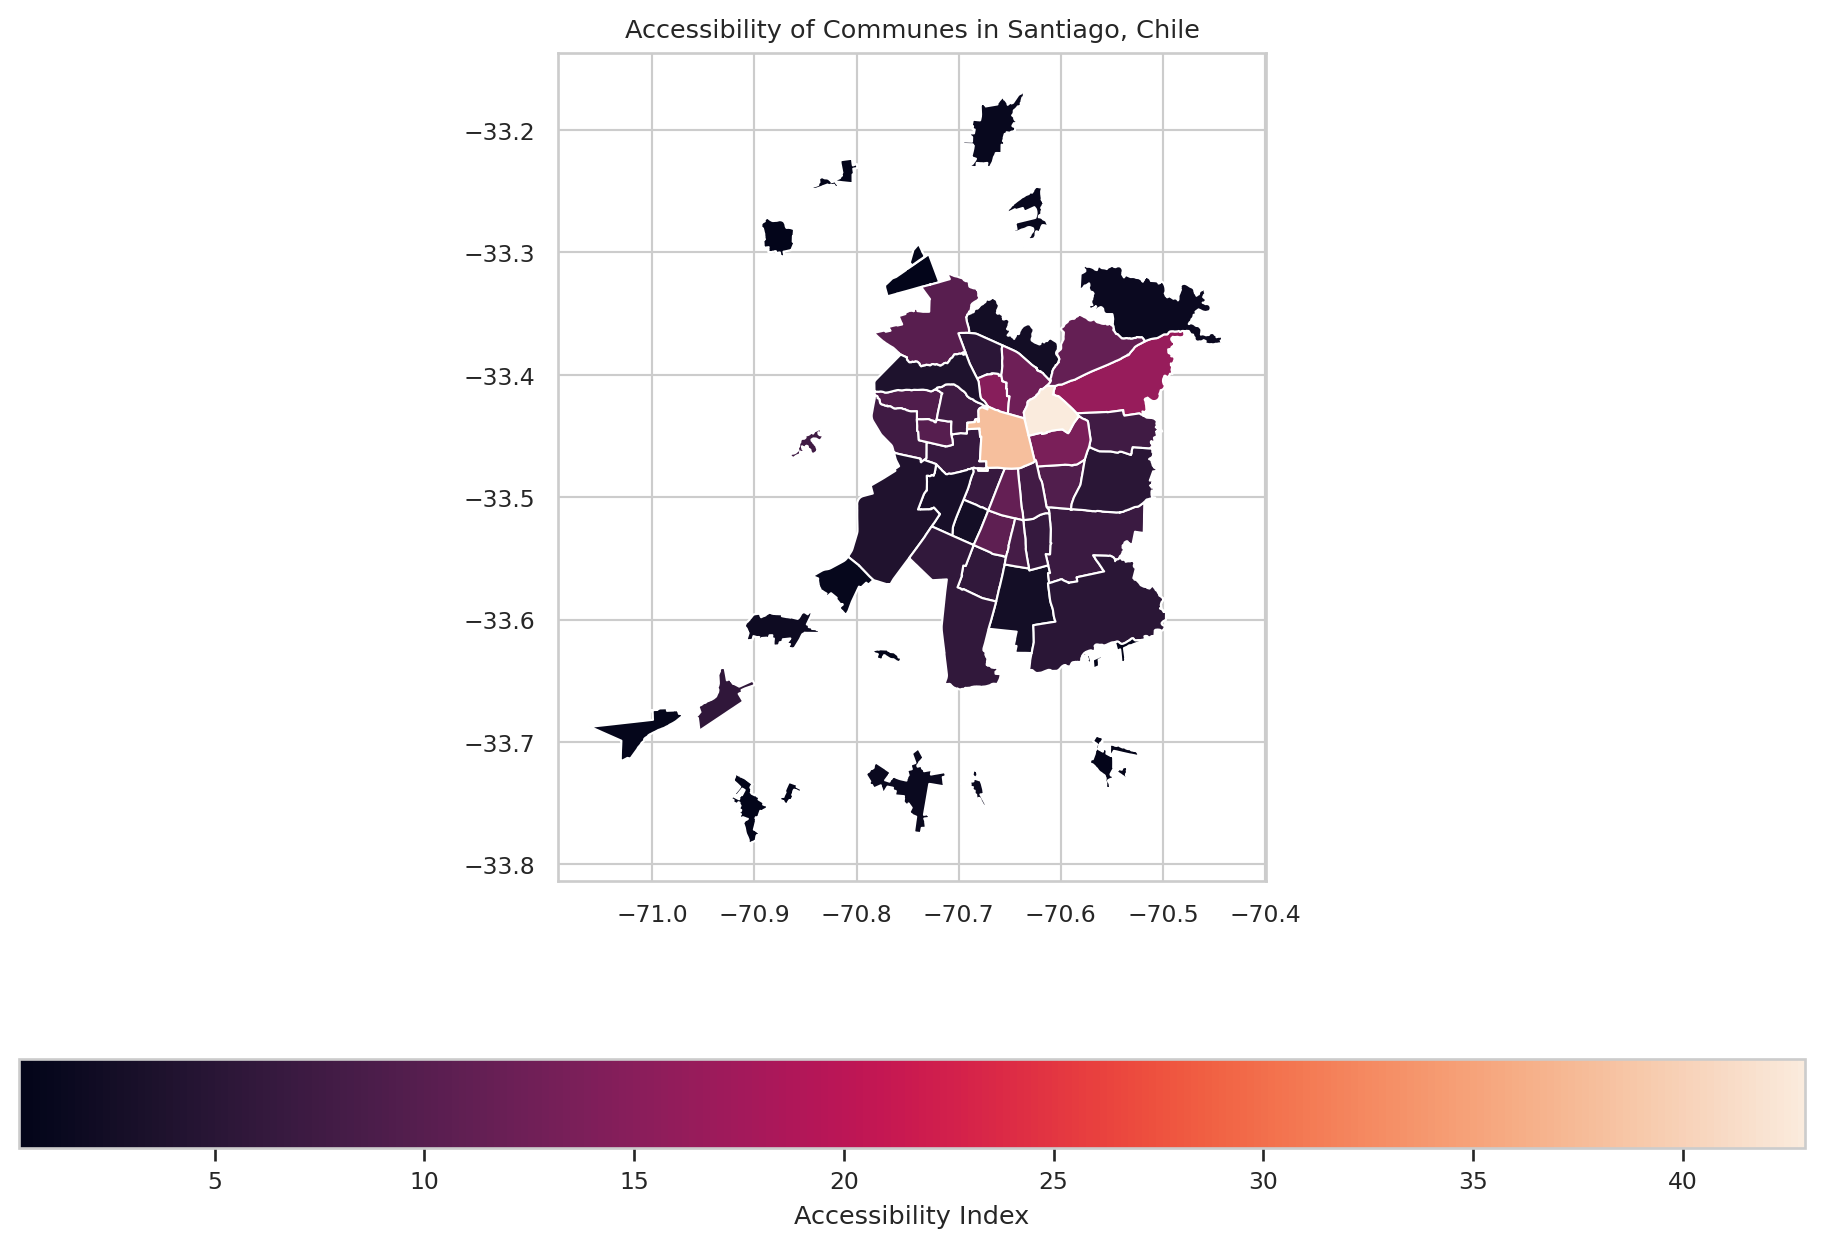

In [ ]:
# Plot the choropleth map with the custom colormap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
communes_gdf.plot(column='accessibility_index', ax=ax, legend=True,
                  legend_kwds={'label': "Accessibility Index",
                               'orientation': "horizontal"})
plt.title('Accessibility of Communes in Santiago, Chile')
plt.show()

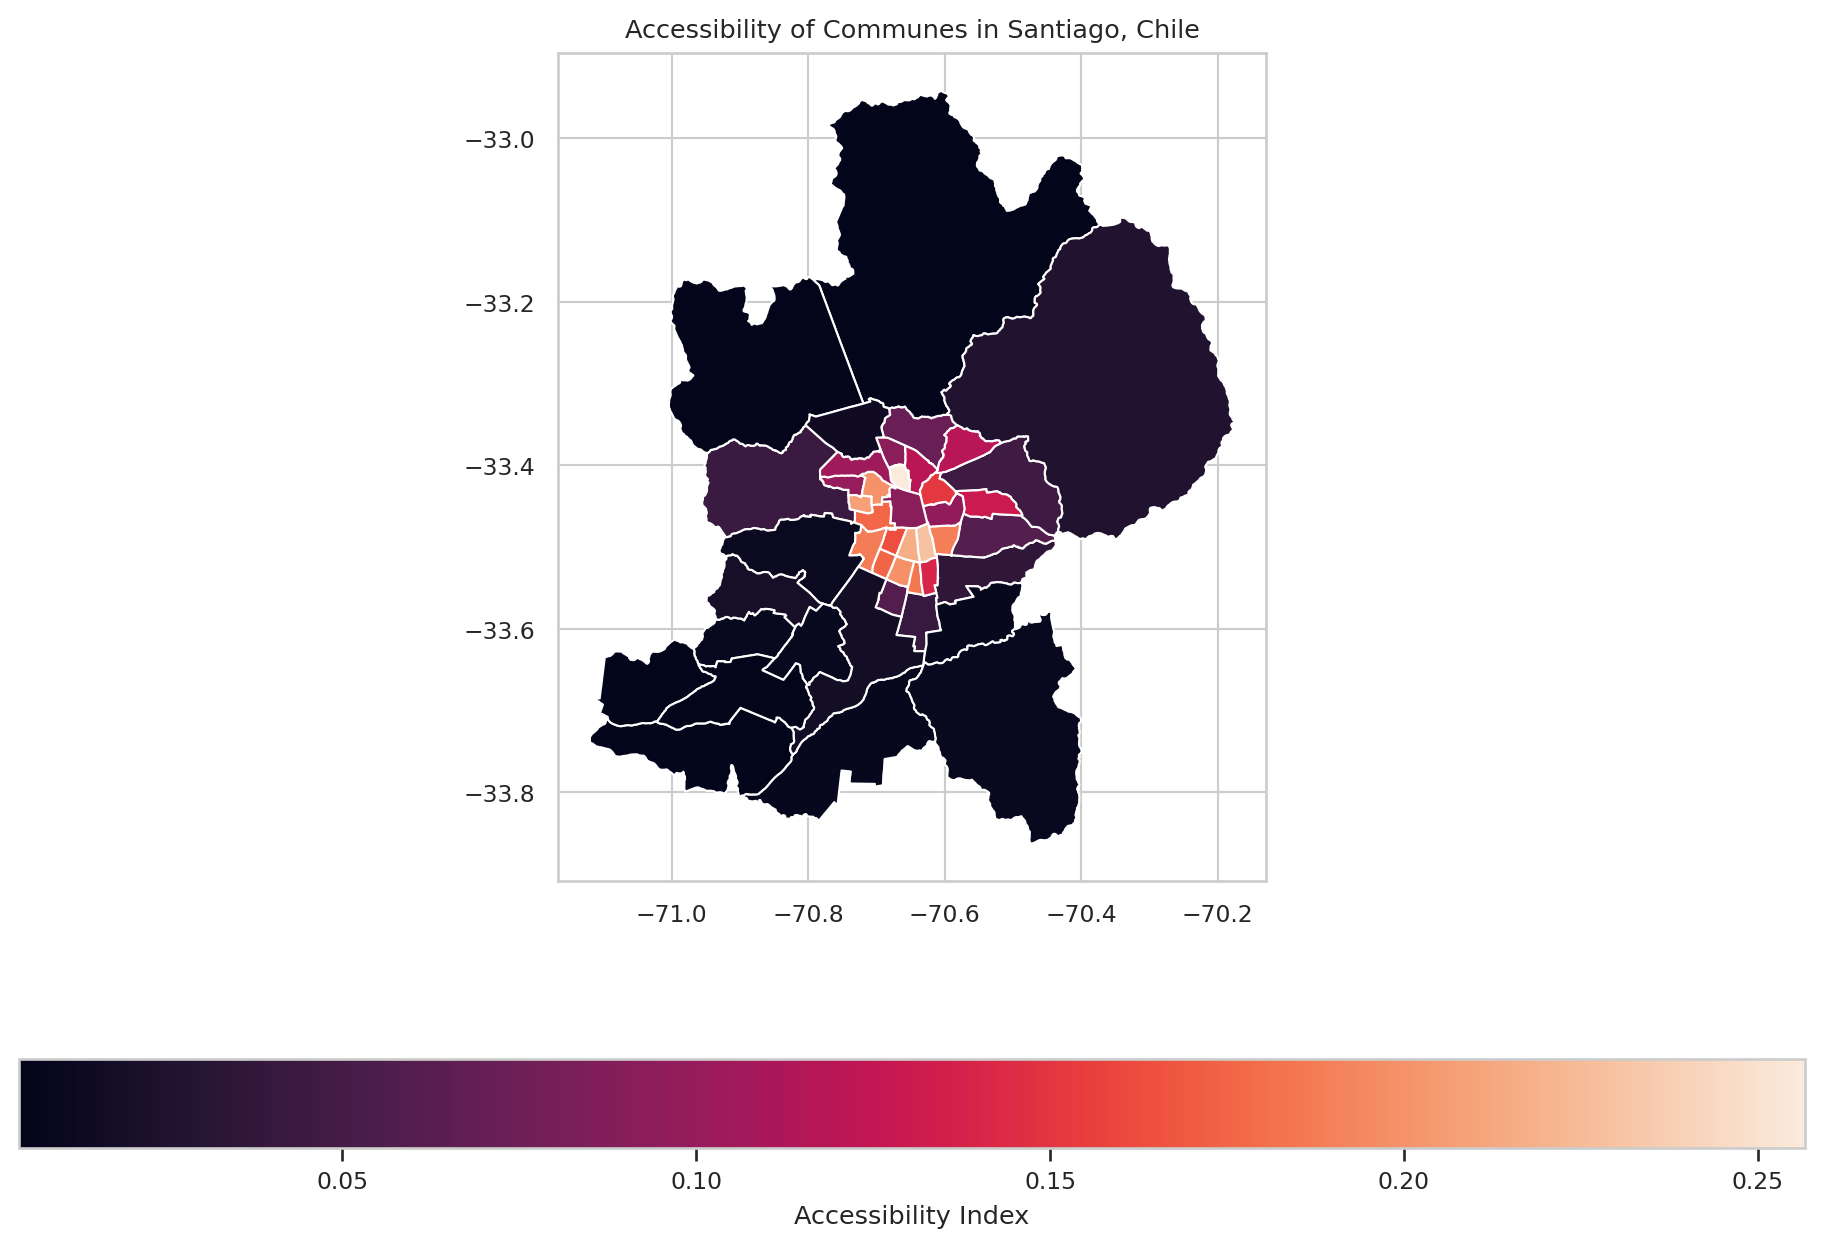

In [ ]:
# Plot the choropleth map with the custom colormap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
communes_gdf.plot(column='accessibility_index', ax=ax, legend=True,
                  legend_kwds={'label': "Accessibility Index",
                               'orientation': "horizontal"})
plt.title('Accessibility of Communes in Santiago, Chile')
plt.show()

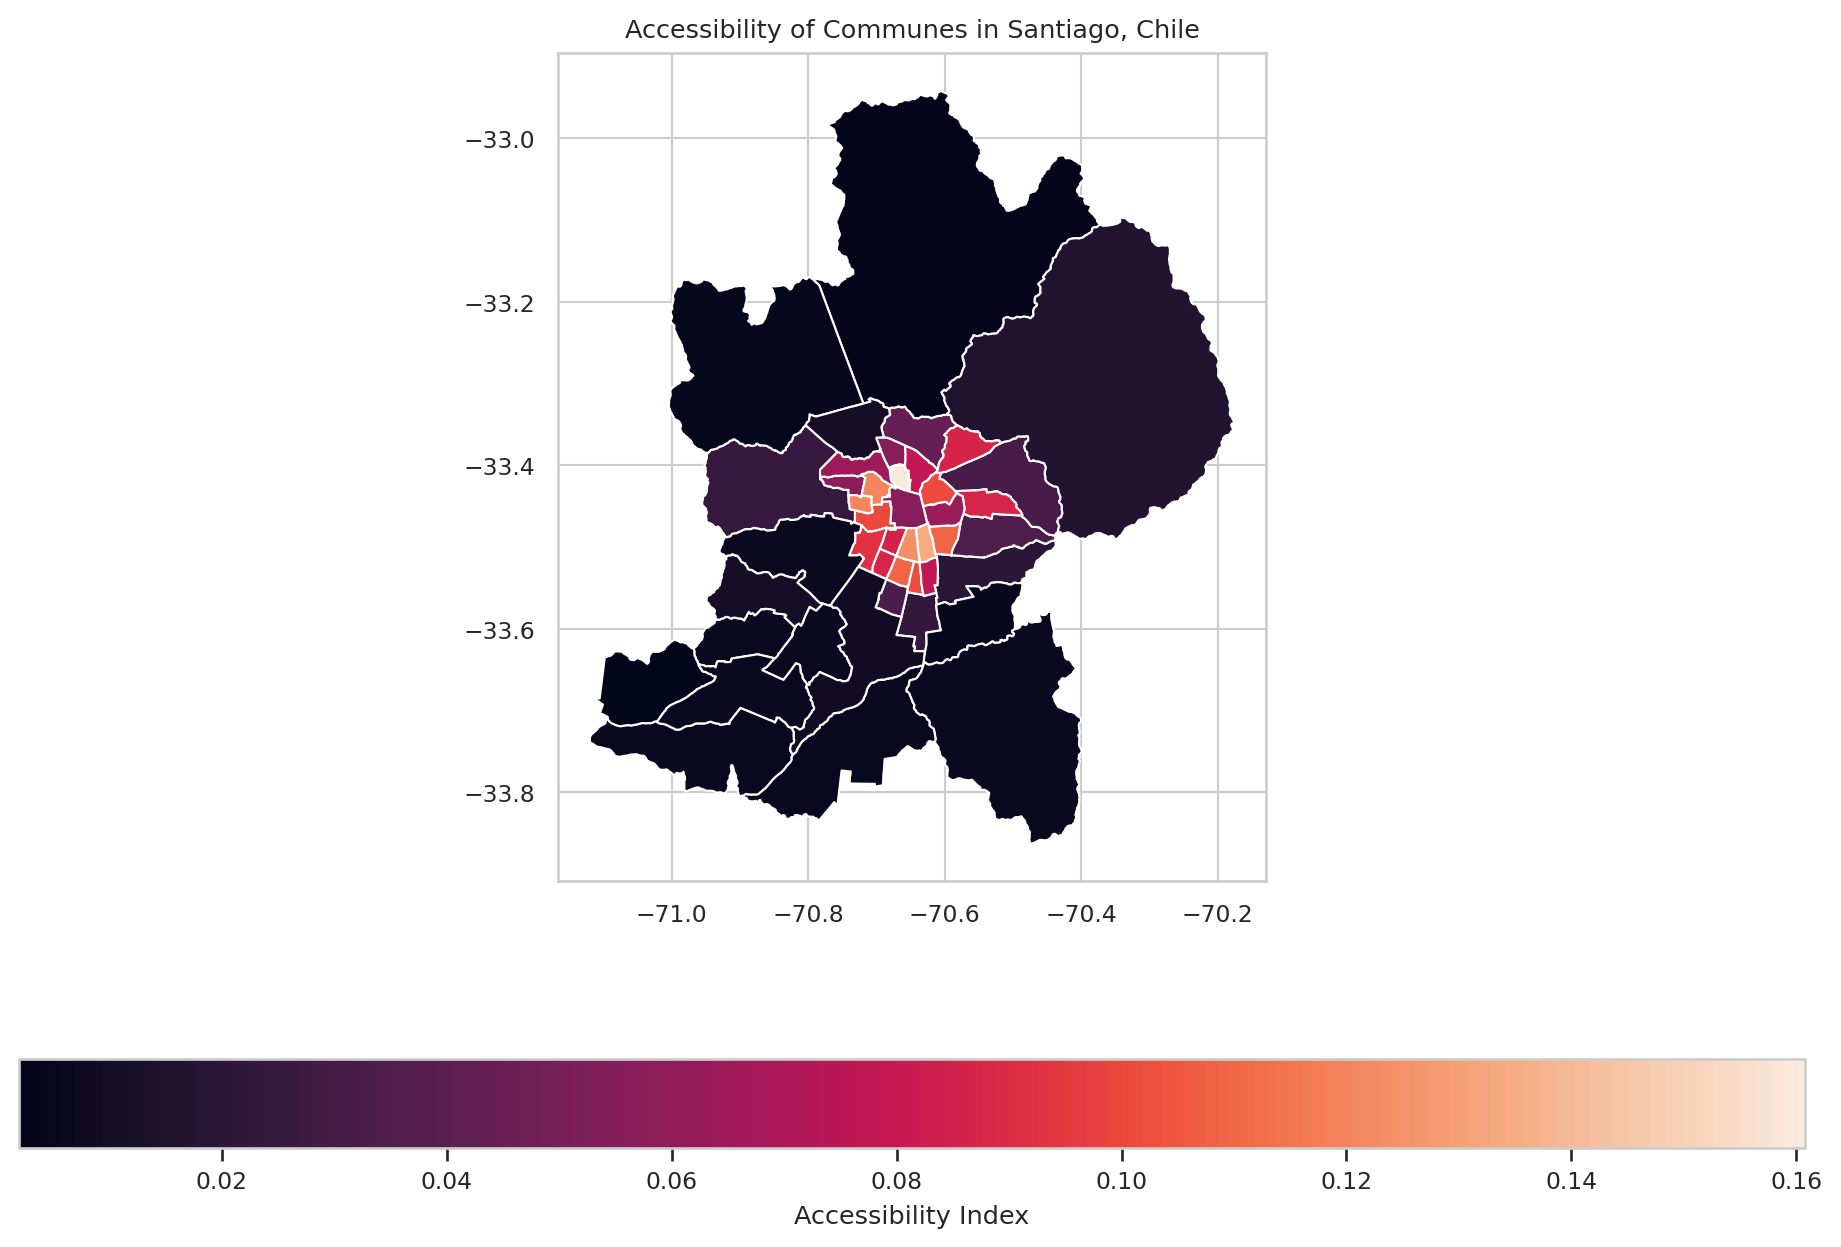

In [ ]:
# Plot the choropleth map with the custom colormap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
communes_gdf.plot(column='accessibility_index', ax=ax, legend=True,
                  legend_kwds={'label': "Accessibility Index",
                               'orientation': "horizontal"})
plt.title('Accessibility of Communes in Santiago, Chile')
plt.show()

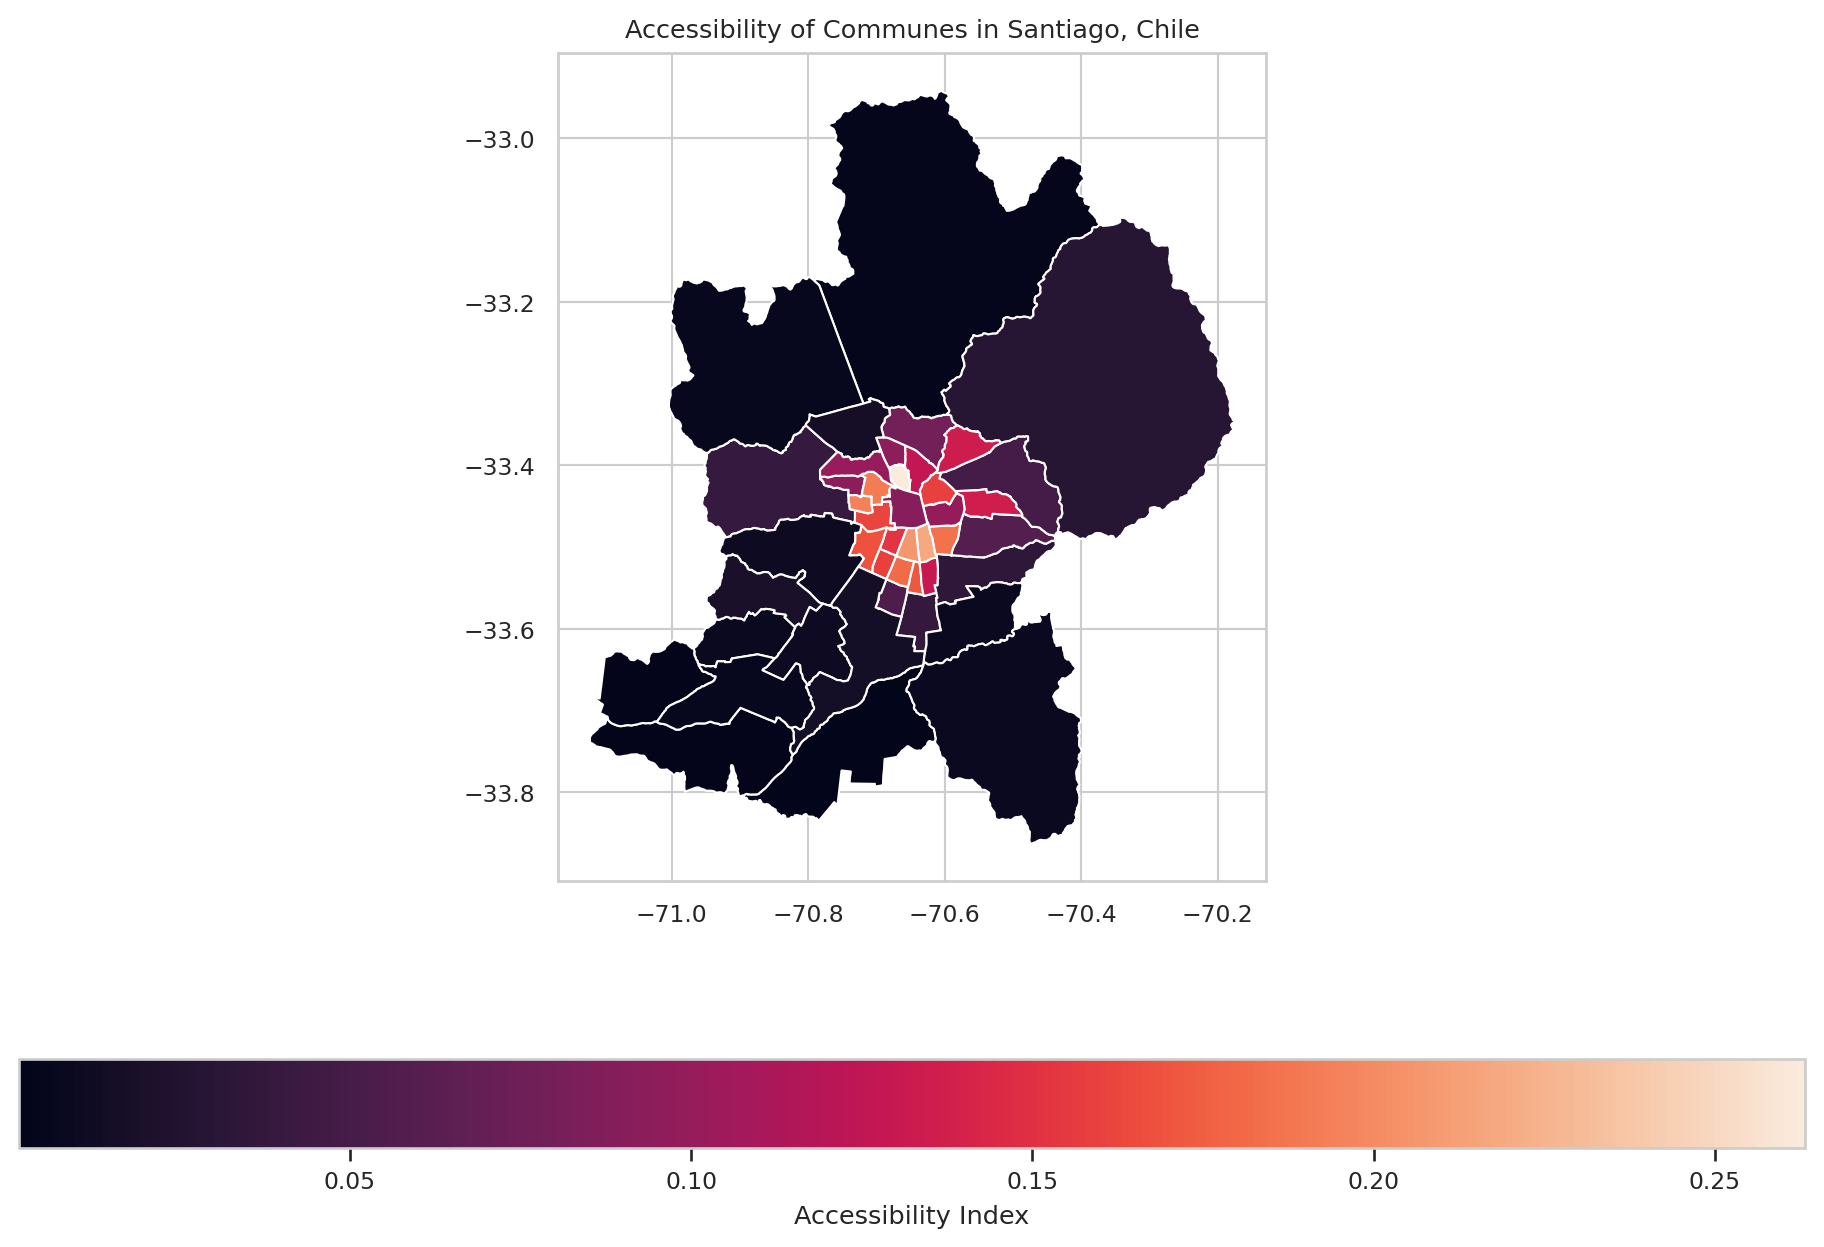

In [ ]:
# Plot the choropleth map with the custom colormap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
communes_gdf.plot(column='accessibility_index', ax=ax, legend=True,
                  legend_kwds={'label': "Accessibility Index",
                               'orientation': "horizontal"})
plt.title('Accessibility of Communes in Santiago, Chile')
plt.show()